In [1]:
import numpy as np
import pandas as pd
import torch
import wandb
from torch.utils.data import DataLoader

import sys
sys.path.append('..')

from datasets import BrainFeaturesDataset
from models import SimpleMLP
from inference import enable_dropout

In [2]:
device = torch.device('cpu')
run_id = 'tjiagom/adni_phenotypes/2cxy59fk'
api = wandb.Api()
best_run = api.run(run_id)

# For SHAP's background
train_dataset = BrainFeaturesDataset('../data/adni_train_scaled_corrected.csv')

model = SimpleMLP(dim_in=train_dataset.X.shape[1], dropout_rate=best_run.config['dropout']).to(device)

restored_path = wandb.restore('simple_mlp.pt', run_path=run_id)
model.load_state_dict(torch.load(restored_path.name))
model.eval()

enable_dropout(model)

ukb_dataset = BrainFeaturesDataset('../data/ukb_scaled_corrected.csv', has_target=False, keep_ids=True)
ukb_loader = DataLoader(ukb_dataset, batch_size=200, shuffle=False)

Enabling dropout layer.


In [3]:
FEATURES_CORTICAL = ['thickness_bankssts_lh', 'thickness_caudalanteriorcingulate_lh',
                     'thickness_caudalmiddlefrontal_lh', 'thickness_cuneus_lh', 'thickness_entorhinal_lh',
                     'thickness_fusiform_lh', 'thickness_inferiorparietal_lh', 'thickness_inferiortemporal_lh',
                     'thickness_isthmuscingulate_lh', 'thickness_lateraloccipital_lh',
                     'thickness_lateralorbitofrontal_lh', 'thickness_lingual_lh', 'thickness_medialorbitofrontal_lh',
                     'thickness_middletemporal_lh', 'thickness_parahippocampal_lh', 'thickness_paracentral_lh',
                     'thickness_parsopercularis_lh', 'thickness_parsorbitalis_lh', 'thickness_parstriangularis_lh',
                     'thickness_pericalcarine_lh', 'thickness_postcentral_lh', 'thickness_posteriorcingulate_lh',
                     'thickness_precentral_lh', 'thickness_precuneus_lh', 'thickness_rostralanteriorcingulate_lh',
                     'thickness_rostralmiddlefrontal_lh', 'thickness_superiorfrontal_lh',
                     'thickness_superiorparietal_lh', 'thickness_superiortemporal_lh', 'thickness_supramarginal_lh',
                     'thickness_frontalpole_lh', 'thickness_temporalpole_lh', 'thickness_transversetemporal_lh',
                     'thickness_insula_lh', 'thickness_bankssts_rh', 'thickness_caudalanteriorcingulate_rh',
                     'thickness_caudalmiddlefrontal_rh', 'thickness_cuneus_rh', 'thickness_entorhinal_rh',
                     'thickness_fusiform_rh', 'thickness_inferiorparietal_rh', 'thickness_inferiortemporal_rh',
                     'thickness_isthmuscingulate_rh', 'thickness_lateraloccipital_rh',
                     'thickness_lateralorbitofrontal_rh', 'thickness_lingual_rh', 'thickness_medialorbitofrontal_rh',
                     'thickness_middletemporal_rh', 'thickness_parahippocampal_rh', 'thickness_paracentral_rh',
                     'thickness_parsopercularis_rh', 'thickness_parsorbitalis_rh', 'thickness_parstriangularis_rh',
                     'thickness_pericalcarine_rh', 'thickness_postcentral_rh', 'thickness_posteriorcingulate_rh',
                     'thickness_precentral_rh', 'thickness_precuneus_rh', 'thickness_rostralanteriorcingulate_rh',
                     'thickness_rostralmiddlefrontal_rh', 'thickness_superiorfrontal_rh',
                     'thickness_superiorparietal_rh', 'thickness_superiortemporal_rh', 'thickness_supramarginal_rh',
                     'thickness_frontalpole_rh', 'thickness_temporalpole_rh', 'thickness_transversetemporal_rh',
                     'thickness_insula_rh']

FEATURES_VOLUME = ['volume_bankssts_lh', 'volume_caudalanteriorcingulate_lh', 'volume_caudalmiddlefrontal_lh',
                   'volume_cuneus_lh', 'volume_entorhinal_lh', 'volume_fusiform_lh', 'volume_inferiorparietal_lh',
                   'volume_inferiortemporal_lh', 'volume_isthmuscingulate_lh', 'volume_lateraloccipital_lh',
                   'volume_lateralorbitofrontal_lh', 'volume_lingual_lh', 'volume_medialorbitofrontal_lh',
                   'volume_middletemporal_lh', 'volume_parahippocampal_lh', 'volume_paracentral_lh',
                   'volume_parsopercularis_lh', 'volume_parsorbitalis_lh', 'volume_parstriangularis_lh',
                   'volume_pericalcarine_lh', 'volume_postcentral_lh', 'volume_posteriorcingulate_lh',
                   'volume_precentral_lh', 'volume_precuneus_lh', 'volume_rostralanteriorcingulate_lh',
                   'volume_rostralmiddlefrontal_lh', 'volume_superiorfrontal_lh', 'volume_superiorparietal_lh',
                   'volume_superiortemporal_lh', 'volume_supramarginal_lh', 'volume_frontalpole_lh',
                   'volume_temporalpole_lh', 'volume_transversetemporal_lh', 'volume_insula_lh', 'volume_bankssts_rh',
                   'volume_caudalanteriorcingulate_rh', 'volume_caudalmiddlefrontal_rh', 'volume_cuneus_rh',
                   'volume_entorhinal_rh', 'volume_fusiform_rh', 'volume_inferiorparietal_rh',
                   'volume_inferiortemporal_rh', 'volume_isthmuscingulate_rh', 'volume_lateraloccipital_rh',
                   'volume_lateralorbitofrontal_rh', 'volume_lingual_rh', 'volume_medialorbitofrontal_rh',
                   'volume_middletemporal_rh', 'volume_parahippocampal_rh', 'volume_paracentral_rh',
                   'volume_parsopercularis_rh', 'volume_parsorbitalis_rh', 'volume_parstriangularis_rh',
                   'volume_pericalcarine_rh', 'volume_postcentral_rh', 'volume_posteriorcingulate_rh',
                   'volume_precentral_rh', 'volume_precuneus_rh', 'volume_rostralanteriorcingulate_rh',
                   'volume_rostralmiddlefrontal_rh', 'volume_superiorfrontal_rh', 'volume_superiorparietal_rh',
                   'volume_superiortemporal_rh', 'volume_supramarginal_rh', 'volume_frontalpole_rh',
                   'volume_temporalpole_rh', 'volume_transversetemporal_rh', 'volume_insula_rh']

FEATURES_VOLUME_EXTRA = ['volume_Left-Cerebellum-White-Matter', 'volume_Left-Cerebellum-Cortex',
                         'volume_Left-Thalamus-Proper', 'volume_Left-Caudate', 'volume_Left-Putamen',
                         'volume_Left-Pallidum', 'volume_Brain-Stem', 'volume_Left-Hippocampus', 'volume_Left-Amygdala',
                         'volume_Left-Accumbens-area', 'volume_Right-Cerebellum-White-Matter',
                         'volume_Right-Cerebellum-Cortex', 'volume_Right-Thalamus-Proper', 'volume_Right-Caudate',
                         'volume_Right-Putamen', 'volume_Right-Pallidum', 'volume_Right-Hippocampus',
                         'volume_Right-Amygdala', 'volume_Right-Accumbens-area']

In [4]:
latest_output_df = pd.read_csv('../results/latest_output.csv', index_col=0)
disease_info_df = pd.read_csv('../data/ukb_diagnosis.csv', index_col=0)
joined_df = latest_output_df.join(disease_info_df, how='inner')

## SHAP definitions

In [5]:
import shap

In [16]:
shap.DeepExplainer

shap.explainers._deep.Deep

In [102]:
e = shap.DeepExplainer(model, torch.tensor(train_dataset.X).to(device))
enable_dropout(model) # DeepExplainer calls model.eval() inside

In [39]:
def show_summary_plot(ids, mc_passes=50):
    X_tmp = np.array([ukb_dataset.X[i] for i, elem in enumerate(ukb_dataset.ids) if elem in ids])

    shap_values = []
    for i in range(mc_passes):
        tmp_shap = e.shap_values(torch.tensor(X_tmp).to(device))
        shap_values.append(tmp_shap[np.newaxis, :]) # shape: 1 X NUM_IDS (14) X NUM_FEATS(155)
    
    shap_values = np.mean(np.concatenate(shap_values), axis=0)
    shap.summary_plot(shap_values, X_tmp, feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))

## Summary Plots for different groups

Predictions on people with AD


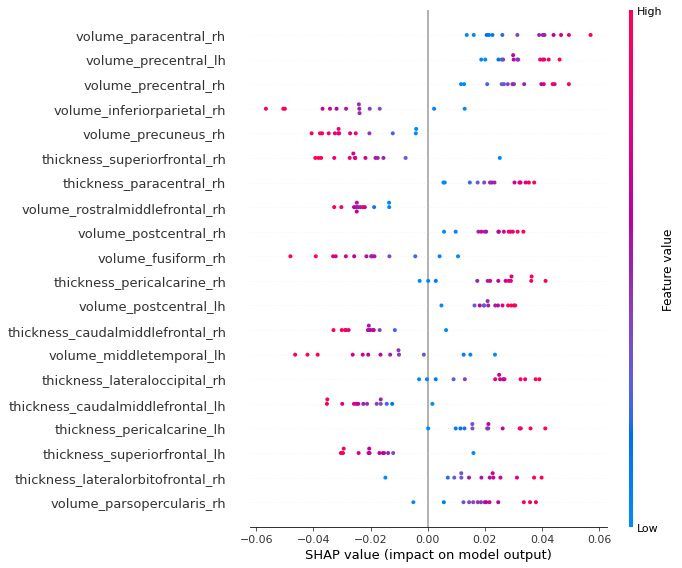

CPU times: user 2min 11s, sys: 6.46 s, total: 2min 18s
Wall time: 17.7 s


In [36]:
%%time
print('Predictions on people with AD')
show_summary_plot(joined_df[joined_df.diag_icd10 == 'AD'].index.values)